## Create expression matrix for COVID-19 related genes in the heart

- Carlos Talavera-López Ph.D | v200419
- Wellcome Sanger Institute 

### Import required modules

In [1]:
import anndata
import pandas as pd
import scanpy as sc

/opt/conda/lib/python3.7/site-packages/dask/config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [2]:
sc.settings.verbosity = 3
sc.logging.print_version_and_date()
sc.settings.set_figure_params(dpi = 260, color_map = 'RdPu', dpi_save = 260, vector_friendly = True, format = 'svg')

Running Scanpy 1.4.7.dev82+ge1cd0d8a, on 2020-06-06 13:19.


### Read in aligned dataset

In [17]:
heart = sc.read_h5ad('/home/jovyan/experiments/1-scGEN_data_integration/hca_heart_global_ctl200606_GWAS_RAW.h5ad')
heart.shape

(452136, 33538)

In [18]:
heart

AnnData object with n_obs × n_vars = 452136 × 33538 
    obs: 'NRP', 'age_group', 'cell_source', 'cell_states', 'donor', 'gender', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'sample', 'scrublet_score', 'type', 'version', 'cell_type'
    obsm: 'X_pca', 'X_umap'

### Select only nuclei datasets

In [19]:
heart_nuclei = heart[heart.obs['cell_source'].isin(['Sanger-Nuclei', 'Harvard-Nuclei'])]
heart_nuclei.obs['cell_type'].cat.categories

Index(['Adipocytes', 'Atrial_Cardiomyocyte', 'Endothelial', 'Fibroblast',
       'Lymphoid', 'Mesothelial', 'Myeloid', 'Neuronal', 'Pericytes',
       'Smooth_muscle_cells', 'Ventricular_Cardiomyocyte'],
      dtype='object')

In [20]:
heart_nuclei.obs['cell_states'].cat.categories

Index(['Adip1', 'Adip2', 'Adip3', 'Adip4', 'B_cells', 'CD16+Mo', 'CD16+NK_1',
       'CD16+NK_2', 'CD4+T_ctl', 'CD4+T_naive', 'CD8+T_cytox', 'CD8+T_tem',
       'PC4_CMC-like', 'EC7_atrial', 'EC10_CMC-like', 'EC8_ln', 'EC1_cap',
       'EC5_art', 'EC3_cap', 'EC2_cap', 'EC6_ven', 'EC4_immune', 'EC9_FB-like',
       'FB1', 'FB2', 'FB3', 'FB4', 'FB5', 'FB6', 'FB7', 'IL17RA+Mo',
       'LYVE1+MØ_tr1', 'LYVE1+MØ_tr2', 'LYVE1+MØ_tr3', 'Mast', 'Meso',
       'Mo_classic', 'Mo_pi', 'MØ_AgP', 'MØ_trmod', 'NC1', 'NC2', 'NC3', 'NC4',
       'NC5', 'NC6', 'NØ', 'PC1_vent', 'PC2_atria', 'SMC2_art', 'SMC1_basic',
       'PC3_stromal', 'aCM1', 'aCM2', 'aCM3', 'aCM4', 'aCM5',
       'Immune_doublets', 'dpT', 'vCM1', 'vCM2', 'vCM3', 'vCM4', 'vCM5',
       'ØdDC_1', 'ØdDC_2'],
      dtype='object')

### Extract expression matrix for COVID-19 genes

In [7]:
heart_covid19 = heart_nuclei[:, ['ACE2','TMPRSS2','IL6R','IL6ST','PCSK1','IL6','PCSK2','CTSE','MYRF','MAG','MOG','MBP','PLP1','FURIN','PCSK4','PCSK5','PCSK6','PCSK7','C1R','C2','C3','C5','CFI','CTSS','CTSL','CTSB','CTSC']]
heart_covid19.shape

(329954, 27)

- Created expression dataframe

In [8]:
expression_mtx = pd.DataFrame(data = heart_covid19.X.T.todense(), index = heart_covid19.var_names, columns = heart_covid19.obs_names).astype(int)
heart_covid19_mtx = expression_mtx.T
heart_covid19_mtx.head(5)

,ACE2,TMPRSS2,IL6R,IL6ST,PCSK1,IL6,PCSK2,CTSE,MYRF,MAG,...,PCSK7,C1R,C2,C3,C5,CFI,CTSS,CTSL,CTSB,CTSC
AAACCTGAGGCCCGTT-1-HCAHeart7664652,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
AAACCTGGTTCCCTTG-1-HCAHeart7664652,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
AAACCTGGTTTGCATG-1-HCAHeart7664652,0,0,0,0,0,0,0,0,0,0,...,2,2,0,0,0,0,0,0,0,0
AAACGGGTCACCCTCA-1-HCAHeart7664652,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
AAAGATGAGGATATAC-1-HCAHeart7664652,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


- Create covariates matrices

In [9]:
covariates_mtx = heart_covid19.obs[['cell_type', 'n_counts','n_genes','donor','sample','gender','age_group','version']]
covariates_mtx.head()

,cell_type,n_counts,n_genes,donor,sample,gender,age_group,version
AAACCTGAGGCCCGTT-1-HCAHeart7664652,Pericytes,1065.0,574,D1,HCAHeart7664652,Female,50-55,V2
AAACCTGGTTCCCTTG-1-HCAHeart7664652,Pericytes,1482.0,833,D1,HCAHeart7664652,Female,50-55,V2
AAACCTGGTTTGCATG-1-HCAHeart7664652,Pericytes,1415.0,748,D1,HCAHeart7664652,Female,50-55,V2
AAACGGGTCACCCTCA-1-HCAHeart7664652,Pericytes,1123.0,564,D1,HCAHeart7664652,Female,50-55,V2
AAAGATGAGGATATAC-1-HCAHeart7664652,Pericytes,1176.0,706,D1,HCAHeart7664652,Female,50-55,V2


- Merge dataframes

In [10]:
heart_covid19_data = pd.merge(heart_covid19_mtx, covariates_mtx, left_index = True, right_index = True)
heart_covid19_data.head()

,ACE2,TMPRSS2,IL6R,IL6ST,PCSK1,IL6,PCSK2,CTSE,MYRF,MAG,...,CTSB,CTSC,cell_type,n_counts,n_genes,donor,sample,gender,age_group,version
AAACCTGAGGCCCGTT-1-HCAHeart7664652,0,0,0,1,0,0,0,0,0,0,...,0,2,Pericytes,1065.0,574,D1,HCAHeart7664652,Female,50-55,V2
AAACCTGGTTCCCTTG-1-HCAHeart7664652,0,0,0,1,0,0,0,0,0,0,...,0,0,Pericytes,1482.0,833,D1,HCAHeart7664652,Female,50-55,V2
AAACCTGGTTTGCATG-1-HCAHeart7664652,0,0,0,0,0,0,0,0,0,0,...,0,0,Pericytes,1415.0,748,D1,HCAHeart7664652,Female,50-55,V2
AAACGGGTCACCCTCA-1-HCAHeart7664652,0,0,0,0,0,0,0,0,0,0,...,0,0,Pericytes,1123.0,564,D1,HCAHeart7664652,Female,50-55,V2
AAAGATGAGGATATAC-1-HCAHeart7664652,0,0,0,0,0,0,0,0,0,0,...,0,0,Pericytes,1176.0,706,D1,HCAHeart7664652,Female,50-55,V2


In [11]:
heart_covid19_data.shape

(329954, 35)

In [21]:
immune_raw = heart_nuclei.copy()
sc.pp.normalize_per_cell(heart_nuclei)
sc.pp.log1p(heart_nuclei)

normalizing by total count per cell


Trying to set attribute `.obs` of view, copying.


    finished (0:00:53): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


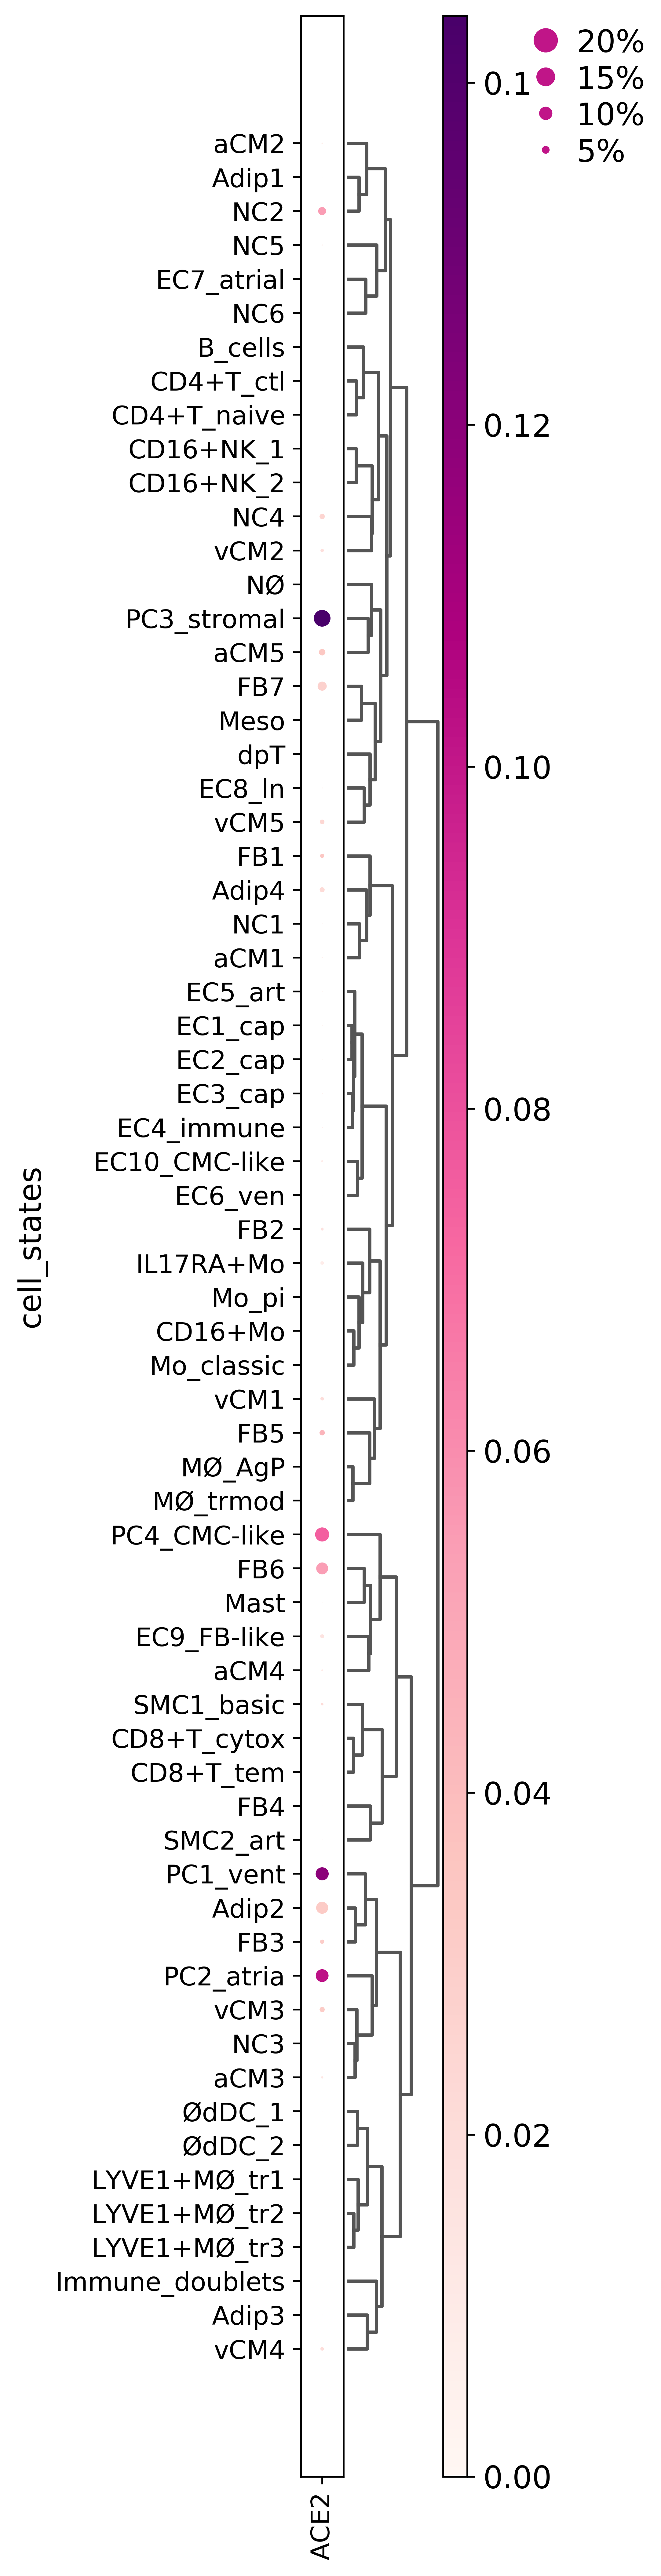

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[0.35, 0.8, 0.2, 0.5, 0.25])

In [23]:
SARS=['ACE2']
sc.pl.dotplot(heart_nuclei, SARS, groupby = 'cell_states', color_map = 'RdPu', dendrogram = True, save = '_HCA_Heart_global_ACE2_ctl200606.svg')

In [25]:
heart_nuclei.obs['cell_type'].cat.categories

Index(['Adipocytes', 'Atrial_Cardiomyocyte', 'Endothelial', 'Fibroblast',
       'Lymphoid', 'Mesothelial', 'Myeloid', 'Neuronal', 'Pericytes',
       'Smooth_muscle_cells', 'Ventricular_Cardiomyocyte'],
      dtype='object')

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_cell_states']`


Trying to set attribute `.uns` of view, copying.


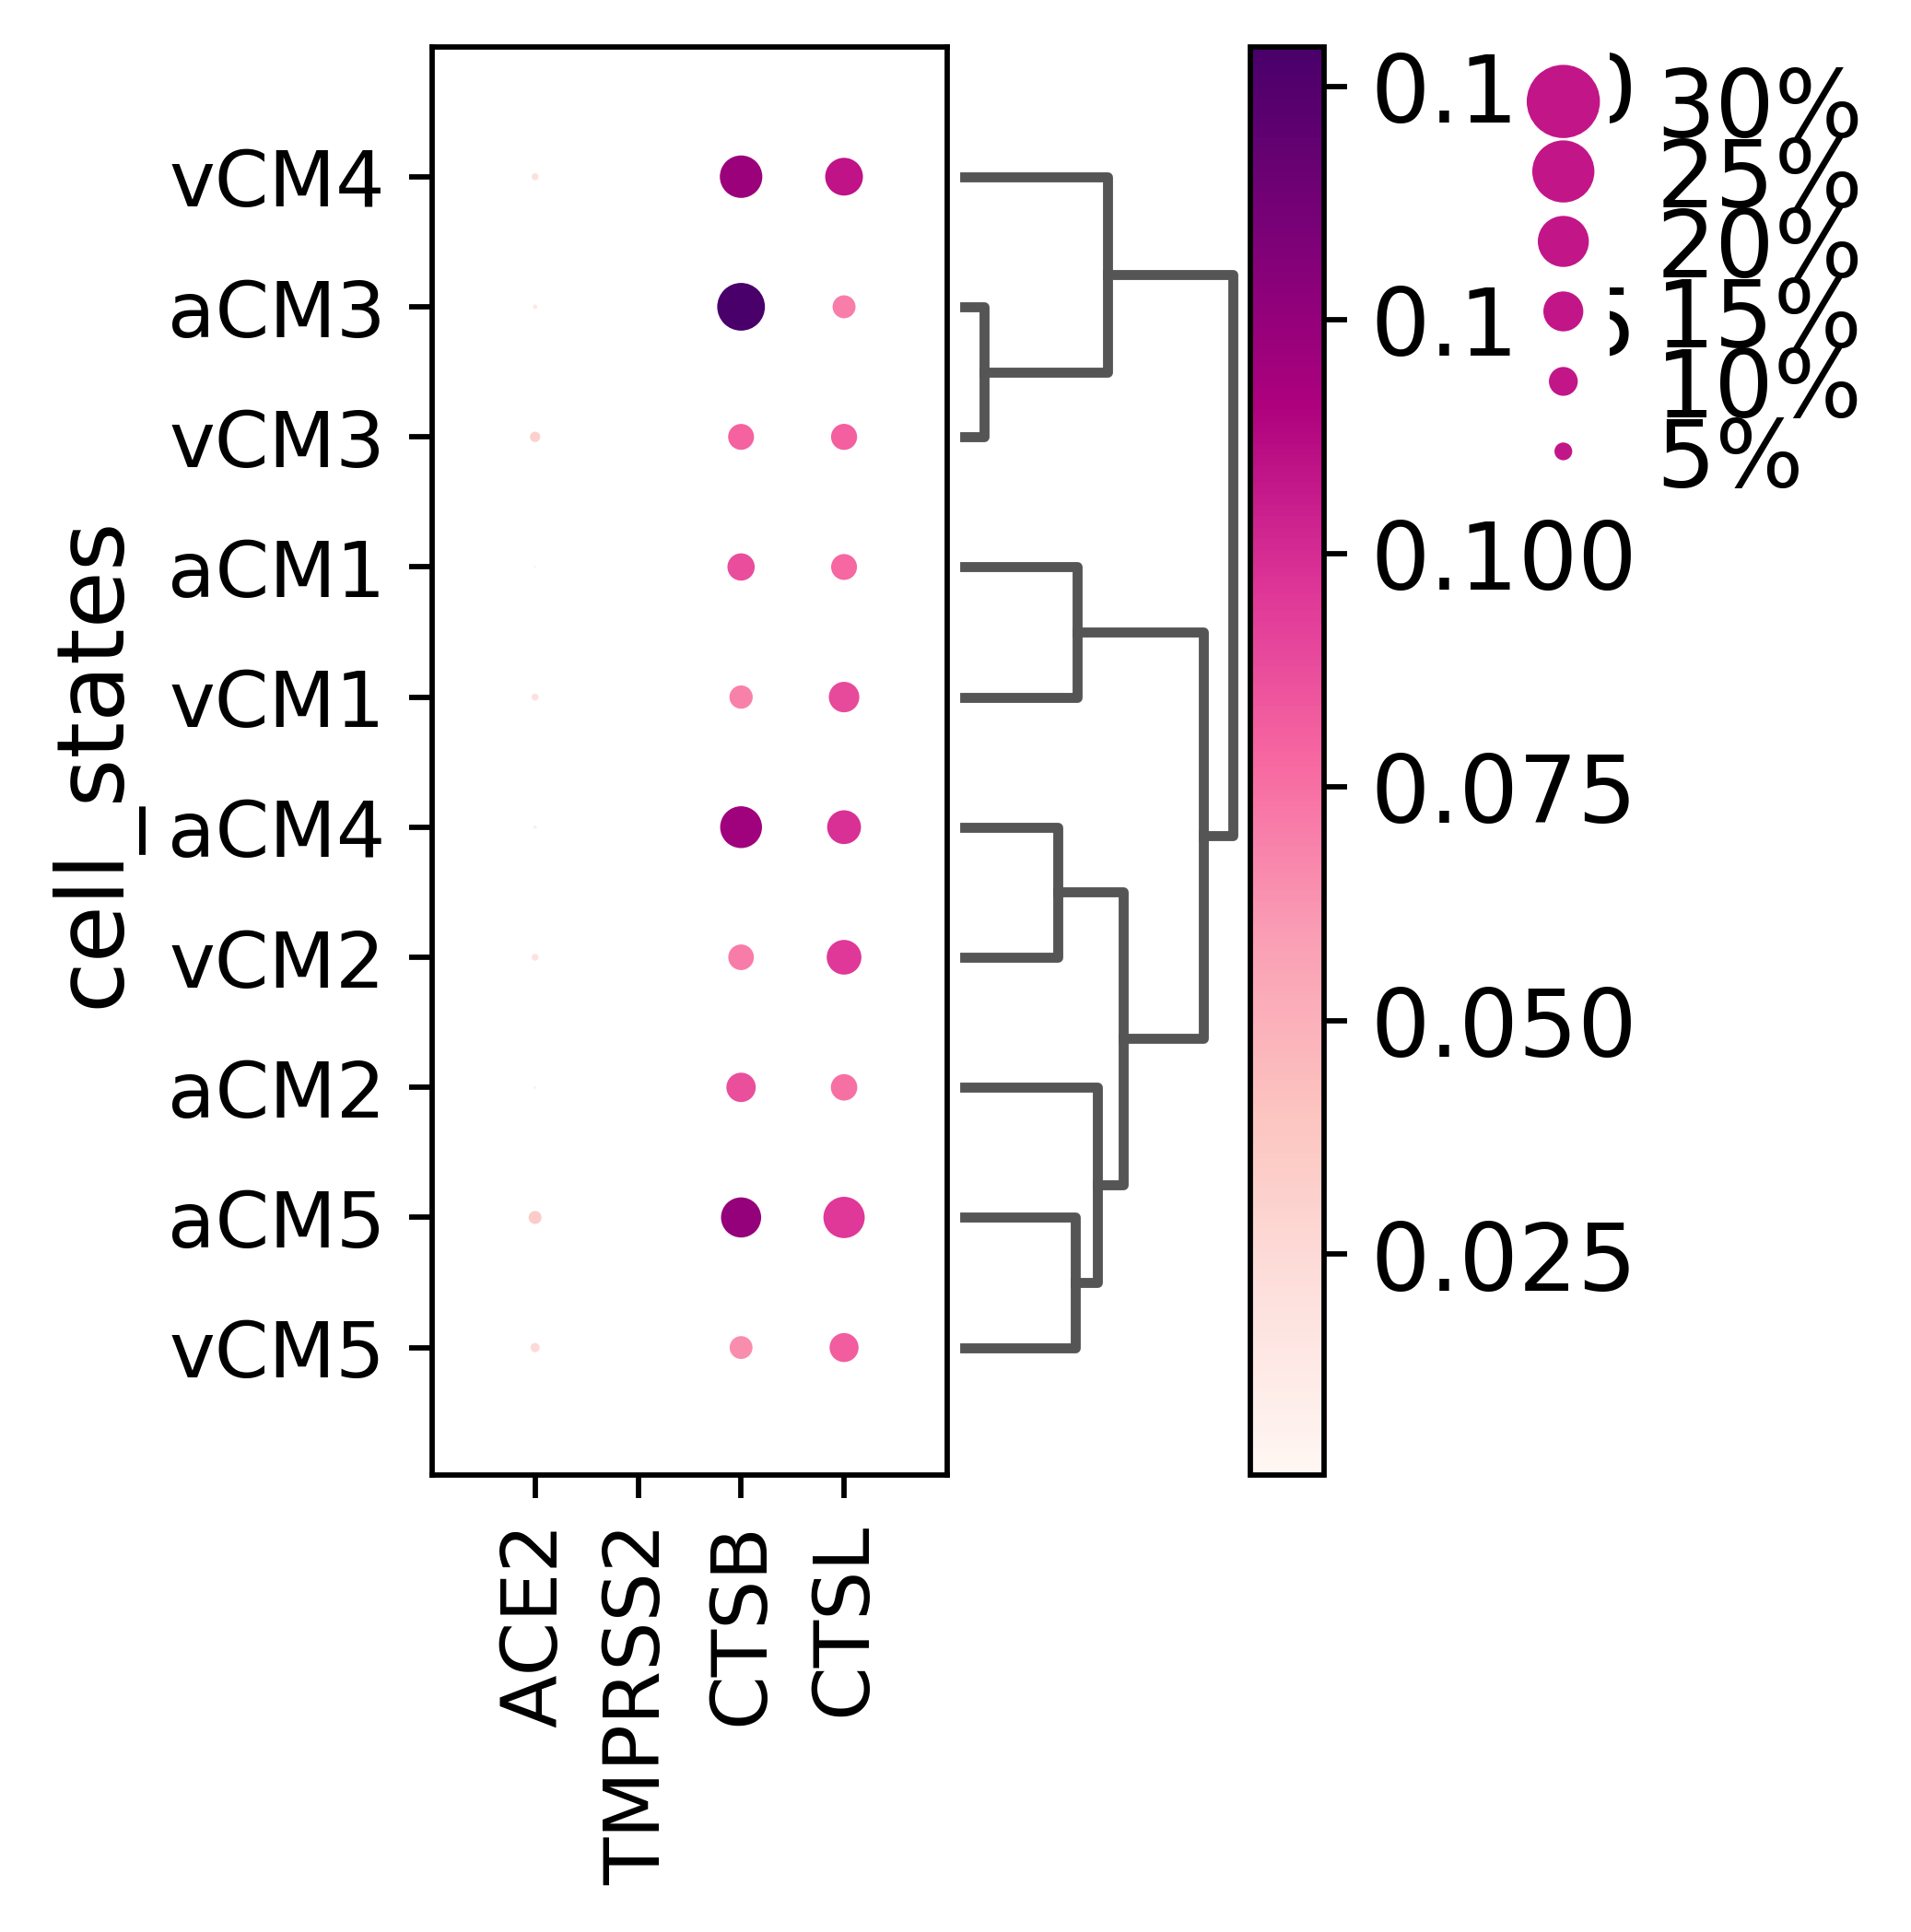

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[1.4, 0.8, 0.2, 0.5, 0.25])

In [27]:
cmc = heart_nuclei[heart_nuclei.obs['cell_type'].isin(['Atrial_Cardiomyocyte','Ventricular_Cardiomyocyte'])]
COVID=['ACE2','TMPRSS2','CTSB','CTSL']
sc.tl.dendrogram(cmc, groupby = 'cell_states')
sc.pl.dotplot(cmc, COVID, groupby = 'cell_states', color_map = 'RdPu', dendrogram = True, save = '_HCA_Heart_global_COVID19-CM_ctl200606.svg')

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_cell_states']`


Trying to set attribute `.uns` of view, copying.


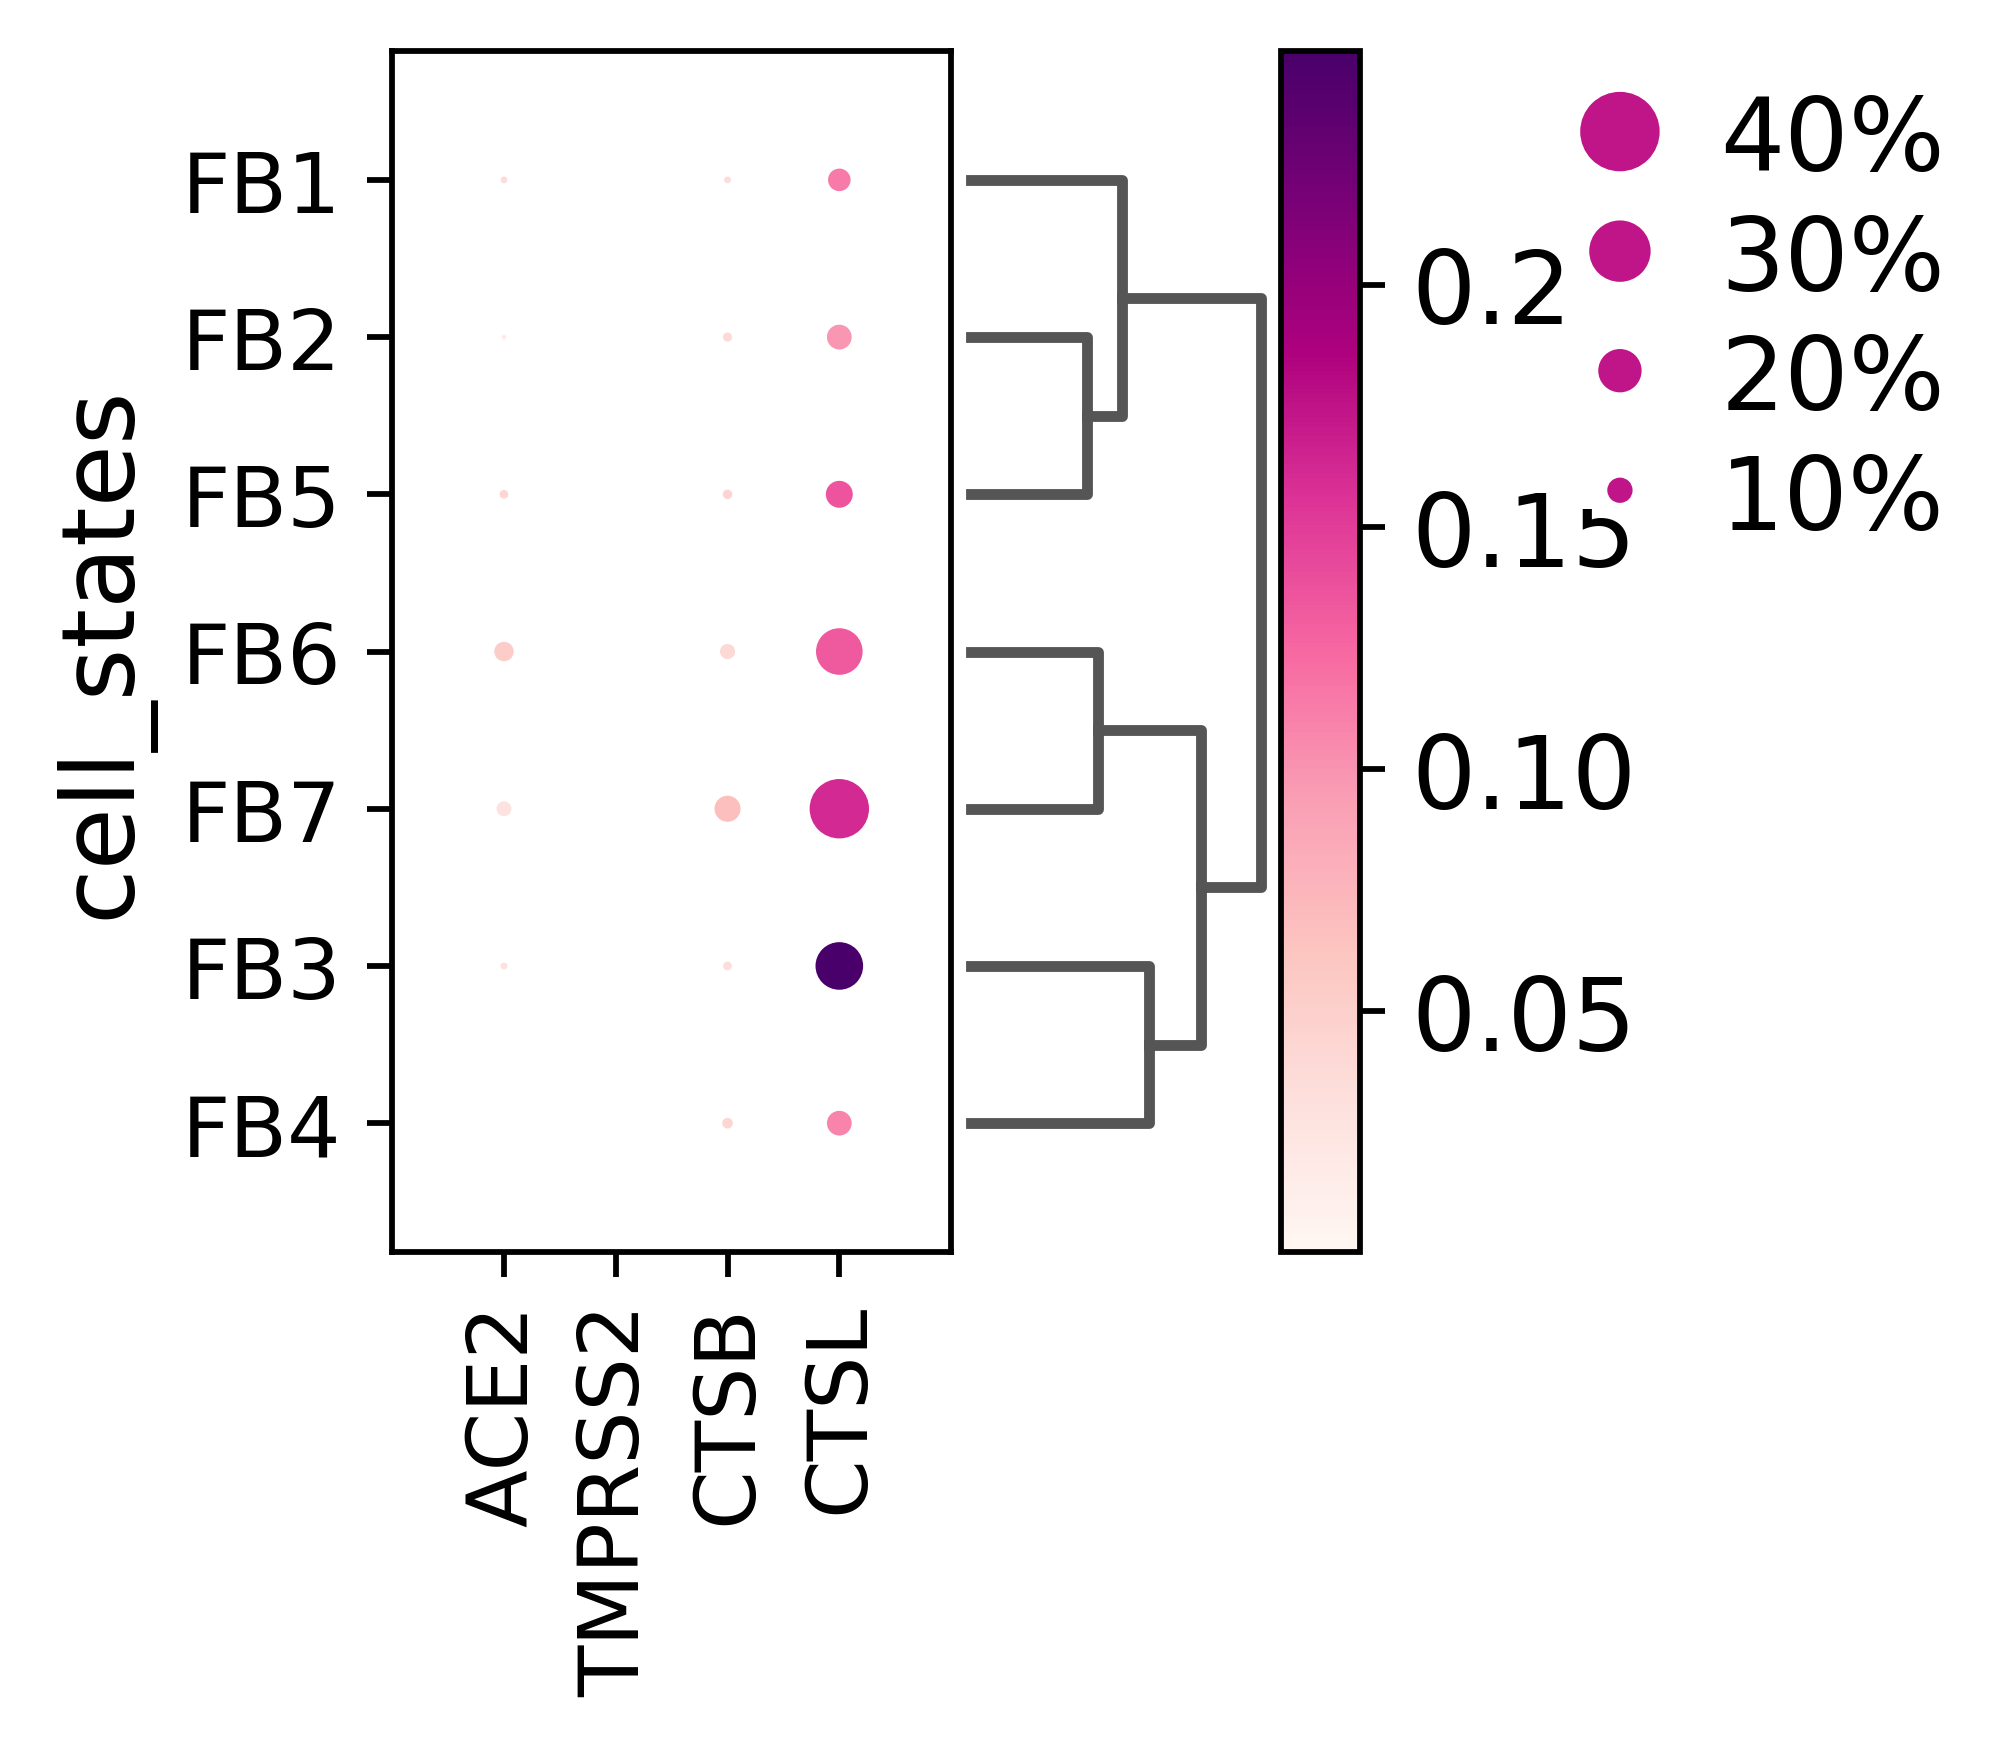

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[1.4, 0.8, 0.2, 0.5, 0.25])

In [28]:
fb = heart_nuclei[heart_nuclei.obs['cell_type'].isin(['Fibroblast'])]
COVID=['ACE2','TMPRSS2','CTSB','CTSL']
sc.tl.dendrogram(fb, groupby = 'cell_states')
sc.pl.dotplot(fb, COVID, groupby = 'cell_states', color_map = 'RdPu', dendrogram = True, save = '_HCA_Heart_global_COVID19-FB_ctl200606.svg')

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_cell_states']`


Trying to set attribute `.uns` of view, copying.


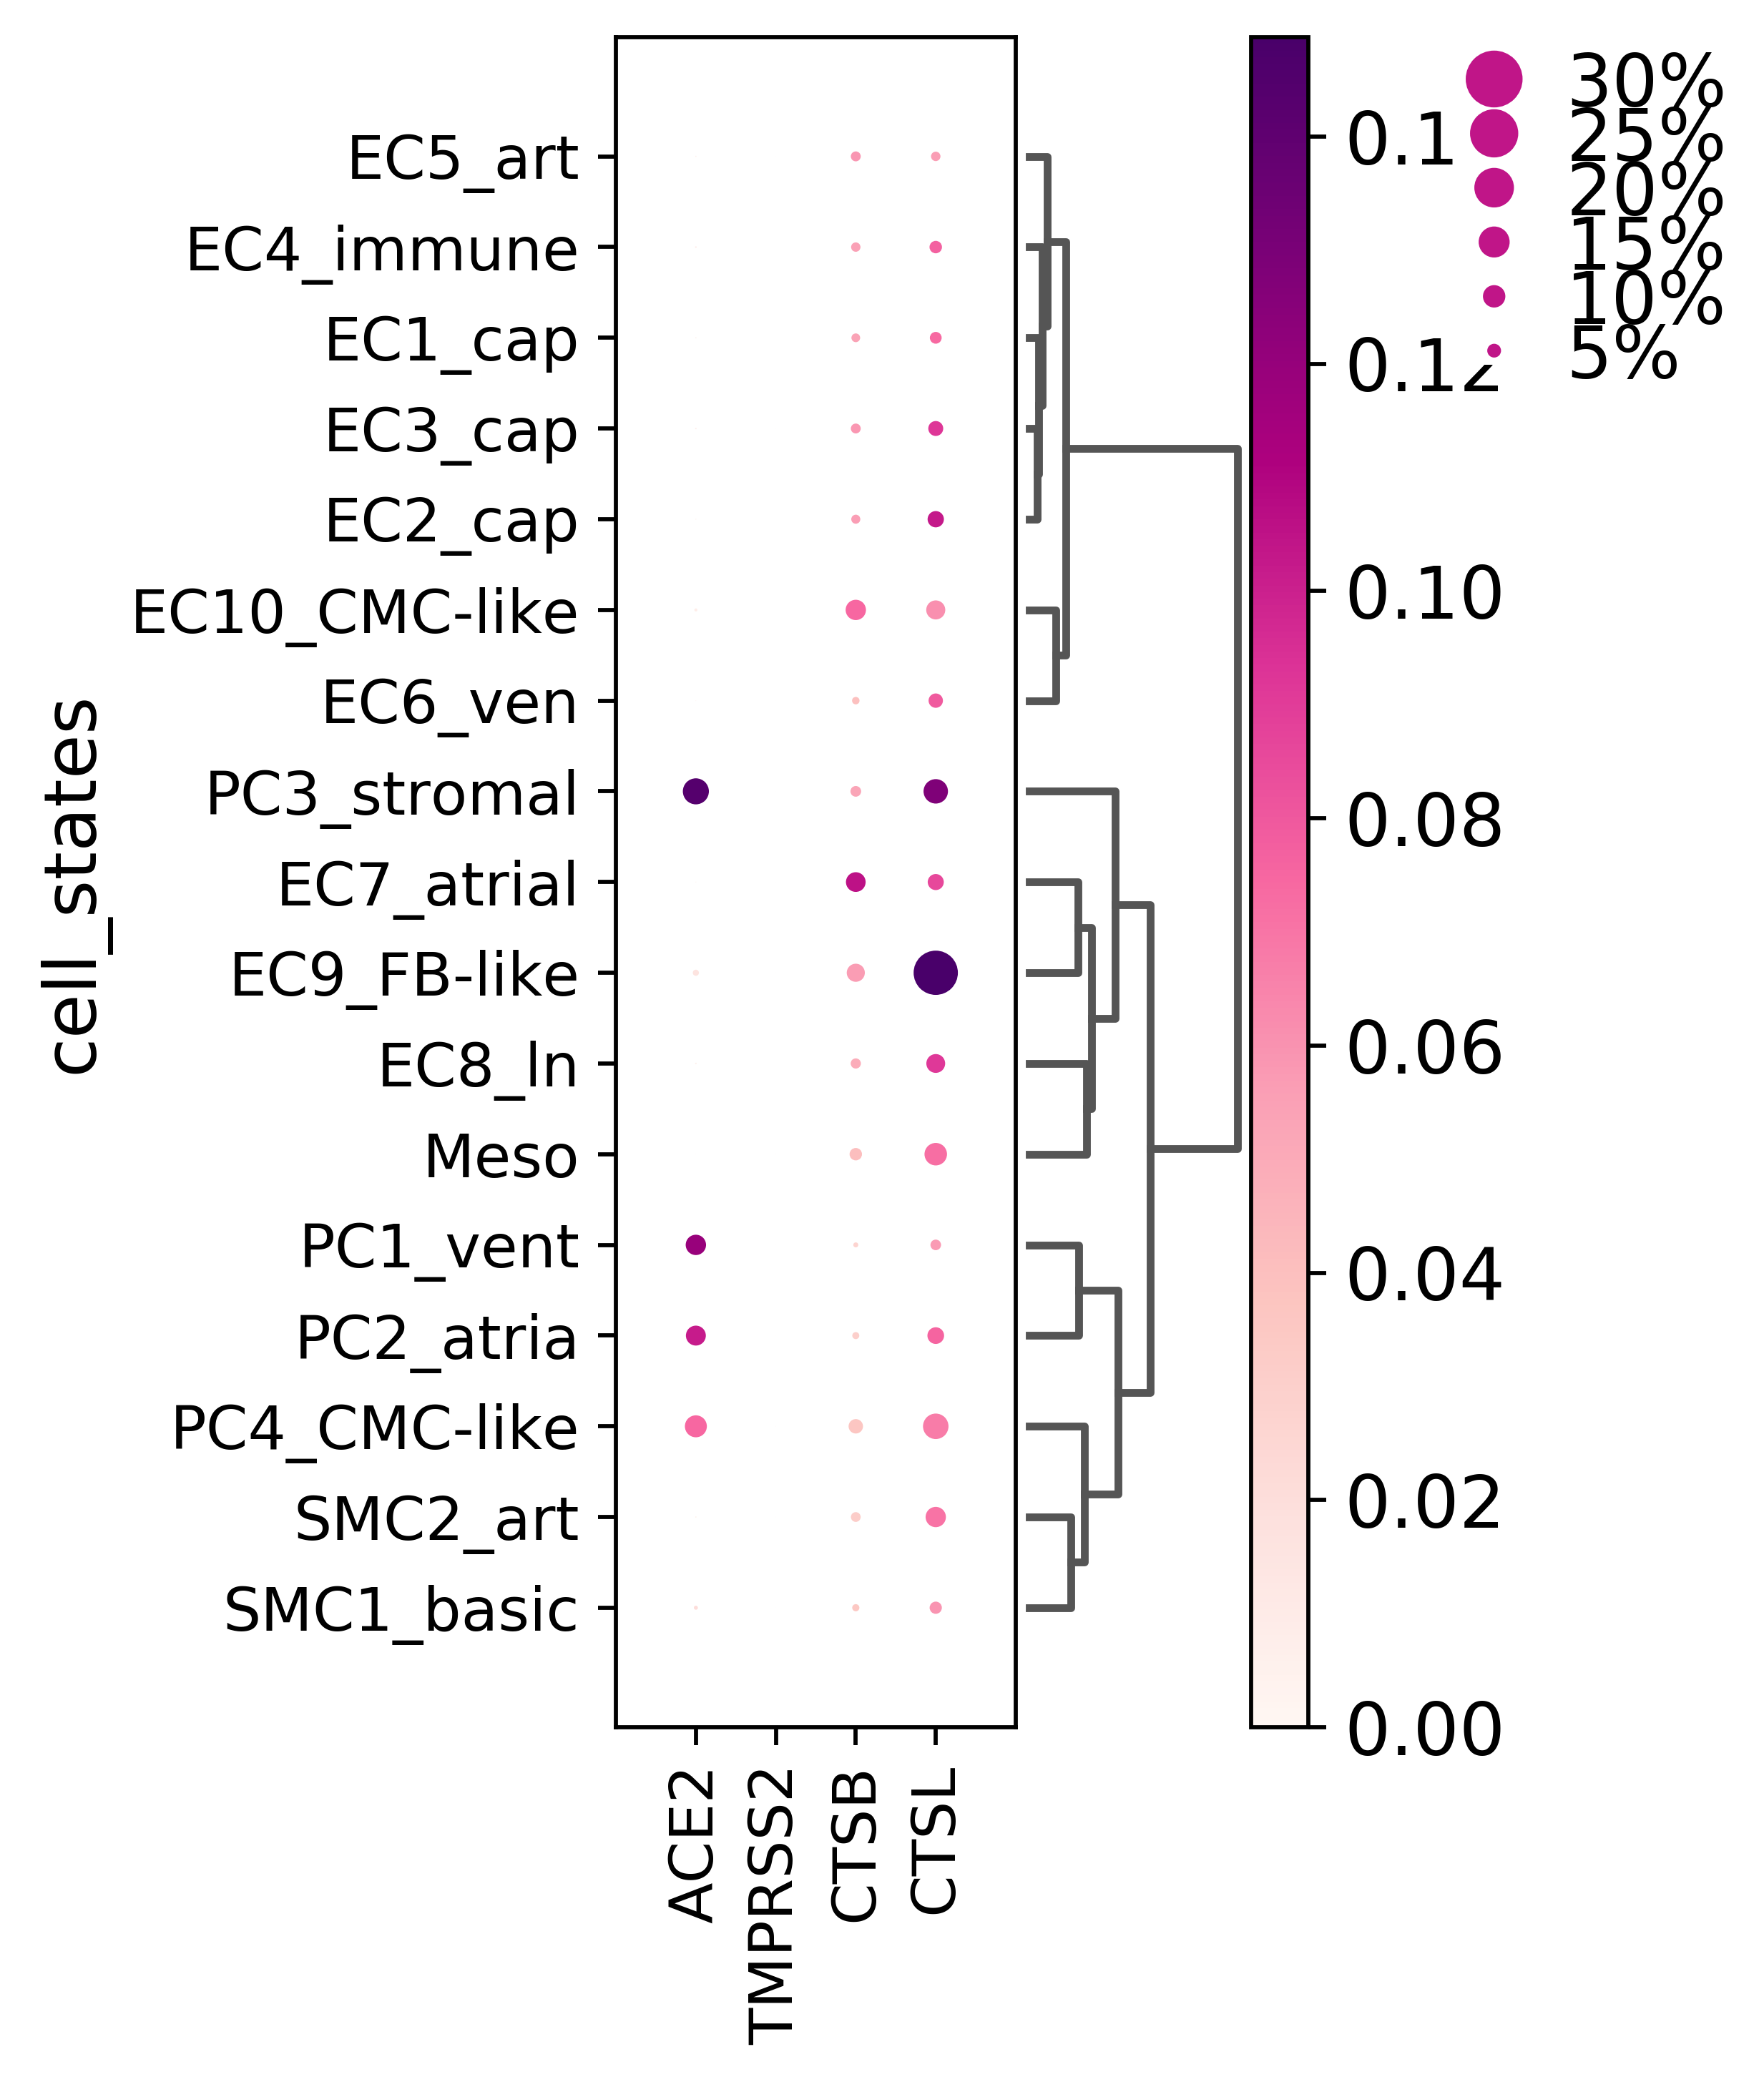

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[1.4, 0.8, 0.2, 0.5, 0.25])

In [29]:
mural = heart_nuclei[heart_nuclei.obs['cell_type'].isin(['Endothelial','Mesothelial','Pericytes','Smooth_muscle_cells'])]
COVID=['ACE2','TMPRSS2','CTSB','CTSL']
sc.tl.dendrogram(mural, groupby = 'cell_states')
sc.pl.dotplot(mural, COVID, groupby = 'cell_states', color_map = 'RdPu', dendrogram = True, save = '_HCA_Heart_global_COVID19-Vascular_ctl200606.svg')

- Export as table

In [ ]:
heart_covid19_data.to_csv('/home/jovyan/experiments/1-scGEN_data_integration/hca_heart_global_COVID-19-genes_expression.tsv', sep = '\t', index = True)